# Week 04 Homework Pt. 2

## 4.1

Let's start with some basic practice using the **shapely** package. Do the following steps:


<ol type="a">
  <li>Creat a polygon from the following points: (-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890,(-118.4142,33.96990,9-118.4152,33.9699)</li>


In [4]:
from shapely.geometry import Polygon

poly = Polygon([(-118.4152,33.9699), (-118.4152,33.9689), (-118.4144,33.9689), (-118.4143, 33.9689), (-118.4142,33.9699), (-118.4152,33.9699)])

2. Create a new variable that stores both x and y coordinates</li>

In [5]:
x_coordinates = [-118.4152, -118.4152, -118.4144, -118.4143, -118.4142, -118.4152]
y_coordinates = [33.9699, 33.9689, 33.9689, 33.9689, 33.9699, 33.9699]

 3. What is the centroid of this polygon?</li>

In [8]:
x_length = len(x_coordinates)
y_length = len(y_coordinates)

x_cent = sum(x_coordinates)/(x_length)
y_cent = sum(y_coordinates)/(y_length)

print(x_cent,y_cent)

-118.41475000000001 33.9694


  4. What is the bounding box? Write an explanation of what the bounding box actual means relative to the polygon.</li>
</ol>

A bounding box is an area that includes all the points in a polygon, or encloses them . It is in a sense, a summary of the polygon area without referencing each specific input. These bounding boxes are useful for maps.

## 4.2

Now let's move on with practicing using **geopandas** and working with various CRS. We will use the County of Los Angeles Justice Equity Need Index (by zip code). Some information on the dataset:
The Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. Updated 2022.

The Justice Equity Need Index (JENI), by Advancement Project California, offers a means to map out the disparate burden that criminalization and a detention-first justice model place on specific communities. The index includes the following indicators:

<ol type="1">

<li>System Involvement: The system-involved population by ZIP Code results in direct needs for justice equity, as measured by adult and youth probation.

- Indicators: Adult Probation (per 1,000 people); Youth Probation (per 1,000 people) </li>

<li>Inequity Drivers: Root inequities across communities that contribute to racial and economic disparities as seen in incarceration and policing.

- Indicators: Black, Latinx, AIAN, and NHPI Percentages of Population (average percentile); Unemployment Rate (%); Population aged 25+ without a High School Diploma (%); Population below 200% of the Federal Poverty Level (%); Violent Crime Rate (per 1,000 people)</li>

<li>Criminalization Risk: Conditions where the criminal justice system has historically taken a detention-first, prevention-last approach.

- Indicators: Mental Health Hospitalizations (per 1,000 people); Substance Use-Related Hospitalizations (per 1,000 people); Homelessness Rate (per 1,000 people)</li>
</ol>

Learn more at https://www.advancementprojectca.org/tools-we-use/maps-and-data/justice-equity-need-index.

Supervisorial Districts, SPAs, and CSAs determined by ZIP Code centroid.


Complete the following tasks:

<ol type="a">
  <li>Load the dataset as a geopandas dataframe. The data is located under 'data/Justice_Equity_Need_Index.geojson' </li>
  <li>What is the default CRS? Write a sentence about what type of CRS it is.</li>
  <li>Remember, geopandas is just the spatial version of pandas with lots of the same functionality. Knowing some commands from pandas from previous exercises, answer the following:

  - What is the size of the dataframe?
  - List the column names.
  - Show the first 10 rows of the dataframe. </li>
  <li>Make a copy of the dataframe. 

  - Reproject the CRS is epsg:3857
  - Use matplotlib to graph BOTH versions of the dataframe, in the original CRS and in the new reprojected CRS. Make sure to use clear titles
  - Write a few sentences of differences you see in the visualizations between the two.  </li>
</ol>


In [10]:
import geopandas as gpd

# Read the file
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)

# Check the coordinate reference system
data.crs

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
len(data)

281

In [12]:
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [14]:
orig = data.copy()

In [15]:
# Reproject the data
data = data.to_crs(epsg=3857)

# Check the new geometry values
print(data['geometry'].head())

0    MULTIPOLYGON (((-13147794.179 4047256.800, -13...
1    MULTIPOLYGON (((-13129326.139 4025429.029, -13...
2    MULTIPOLYGON (((-13179177.697 4002548.915, -13...
3    MULTIPOLYGON (((-13224787.024 4048688.878, -13...
4    MULTIPOLYGON (((-13179462.784 3993751.501, -13...
Name: geometry, dtype: geometry


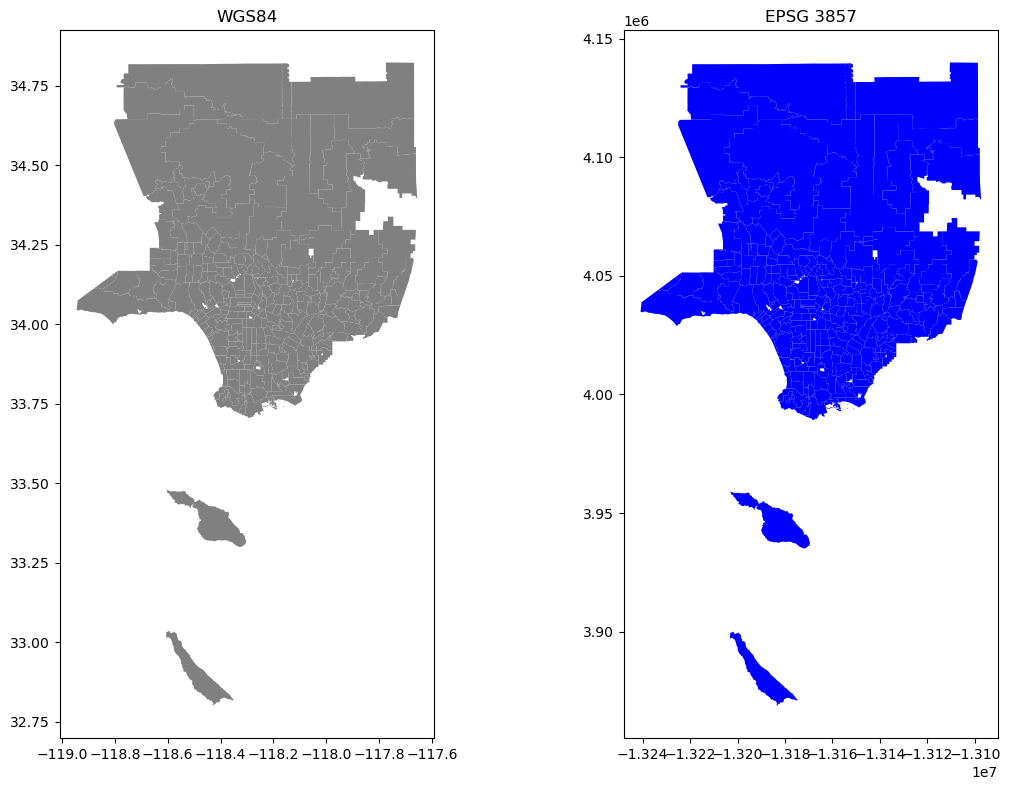

In [20]:
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("EPSG 3857");

# Remove empty white space around the plot
plt.tight_layout()

The plot axes vary widely in value. The EPSG map is made up of values to the sixth degree. This is because the WGS 84 is the standard global reference system and the EPSG, or Spherical Mercator projection coordinate system, is used for services such as google maps. The WGS is based on a spheroid, and measures in degrees. It is less practical than the EPSG, which brings the data to a 2-d flattened surface. This explains the difference in map scale. 